# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [20]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.decomposition import PCA    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DTR
import statsmodels.api as sm

import warnings
warnings.simplefilter('ignore')

In [2]:
# Your code here. 

data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}


student_data = pd.DataFrame(data)

student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

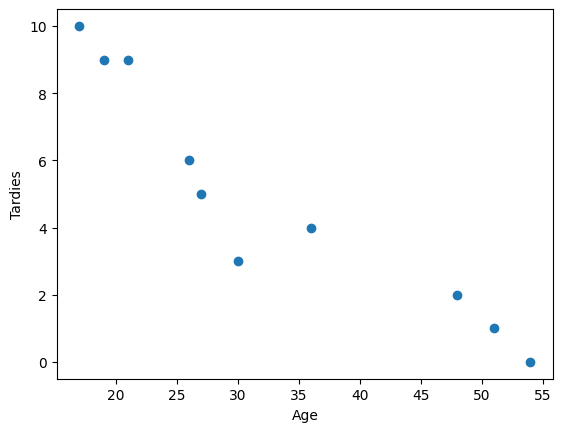

In [3]:
# Your code here.


x_values = student_data['Age']
y_values = student_data['Tardies']


plt.scatter(x_values, y_values)
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here: por lo que se puede observar, conforme aumenta la edad vemos que el número de retrasos disminuye.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
cov = student_data.cov().loc['Age', 'Tardies']
corr = student_data.corr().loc['Age', 'Tardies']

print(f'Covarianza: {cov}')
print(f'Correlacion: {corr}')

# La covarianza indica que hay una relación inversa entre la edad y los retrasos. Cuanto mayor es una, menor es la otra.
# La correlación tan cercana a -1 indica la fuerte relación inversa existente, reafirmando lo anterior.


Covarianza: -45.56666666666666
Correlacion: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
X = student_data[['Age']]      # escogemos la edad como variable independiente
y = student_data['Tardies']    # escogemos los retrasos como variable dependiente

modelo = LinearRegression()    # inicializamos el modelo
modelo.fit(X, y)              # ajustamos el modelo

LinearRegression()

In [7]:
modelo.coef_   # pendiente

array([-0.24282077])

In [8]:
modelo.intercept_      # ordenada en el origen 

12.888803363135771

Plot your regression model on your scatter plot.

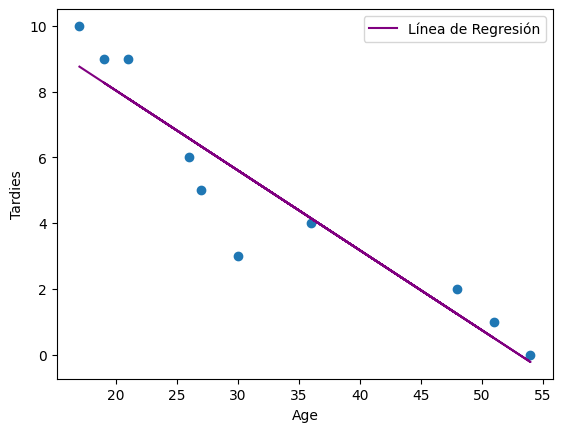

In [9]:
# Your code here.
linea = modelo.intercept_ + modelo.coef_ * X
plt.scatter(x_values, y_values)    
plt.plot(X, linea, color='purple', label='Línea de Regresión')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()

plt.show();

In [10]:
modelo.score(X, y)

0.8820265558250109

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Your response here. 
'''

El valor anterior indica que el modelo explica aproximadamente el 88,2% de la varianza de los retrasos basándonos en la edad, lo cual indica que en este caso
la edad tiene fuerte capacidad predictiva sobre la cantidad de veces que los estudiantes llegan tarde a la clase, sin tener en cuenta otras variables que 
pudiesen influir, ya que correlación no implica causalidad.

'''

'\n\nEl valor anterior indica que el modelo explica aproximadamente el 88,2% de la varianza de los retrasos basándonos en la edad, lo cual indica que en este caso\nla edad tiene fuerte capacidad predictiva sobre la cantidad de veces que los estudiantes llegan tarde a la clase, sin tener en cuenta otras variables que \npudiesen influir, ya que correlación no implica causalidad.\n\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

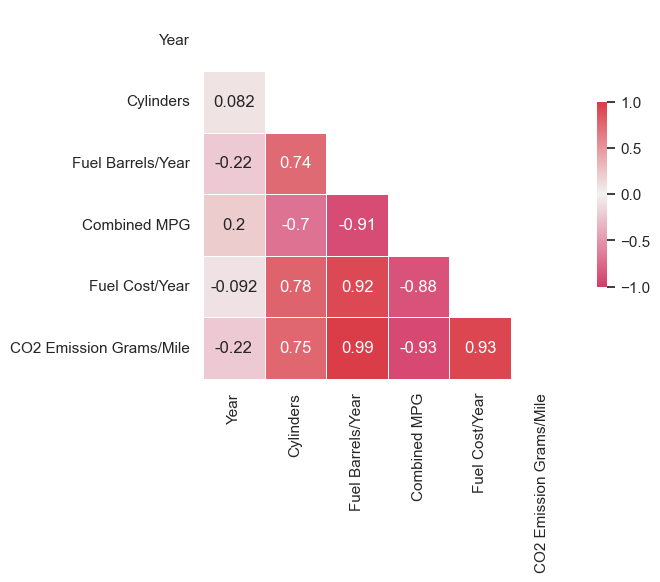

In [13]:
# Your response here. 
coches = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
corr = coches.corr()

sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );

In [14]:
'''
El gráfico anterior nos indica que la columna CO2 Emission Grams/Mile está correlacionada positivamente tanto con Fuel Barrels/Year como con Fuel Cost/Year.
A su vez, está correlacionada negativamente con la columna Combined MPG.

'''

'\nEl gráfico anterior nos indica que la columna CO2 Emission Gramms/Mile está correlacionada positivamente tanto con Fuel Barrels/Year como con Fuel Cost/Year.\nA su vez, está correlacionada negativamente con la columna Combined MPG.\n\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
# Your response here. 
X = coches.drop(columns=['CO2 Emission Grams/Mile'])

y = vehicles['CO2 Emission Grams/Mile']

dtr = DTR().fit(X, y)

dict(zip(X.columns, dtr.feature_importances_*100))




{'Year': 0.008032470175277808,
 'Cylinders': 0.004013977741160818,
 'Fuel Barrels/Year': 83.82927009568839,
 'Combined MPG': 16.125760871499004,
 'Fuel Cost/Year': 0.032922584896174514}

In [25]:
dtr.score(X, y)

0.9995584428233178

In [ ]:
'''

He utilizado un modelo de regresión de árbol de decisión (DecisionTreeRegressor). Luego, he calculado la importancia de cada característica en la predicción 
de 'CO2 Emission Grams/Mile' así como el score, que indica que el modelo explica al 99,9% la relación entre variables. Esto puede indicar cierto overfitting, 
al no haber dividido los datos en grupos de entrenamiento y prueba.

El resultado indica que 'Fuel Barrels/Year' es la característica más importante para determinar 'CO2 Emission Grams/Mile', ya que tiene una importancia 
relativa significativamente alta en comparación con las demás

'''

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Your response here. 
# Voy a realizar otro modelo de regresión para comparar con el anterior, en este caso, el modelo OLS: 

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:14:23   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# CONCLUSIONES:
'''
Comparando los dos modelos, el modelo de regresión con árboles de decisión y el modelo de regresión lineal ordinaria (OLS), podemos observar algunas diferencias 
clave:

Respecto al desempeño del Modelo:

El modelo OLS tiene un R-cuadrado de 0.981, es decir, explica aproximadamente el 98.1% de la variabilidad en la variable de respuesta (CO2 Emission Grams/Mile).
El modelo de árbol de decisión tiene un puntaje (score) de 0.999, que es incluso más alto, indicando un ajuste muy bueno.

Respecto a los coeficientes:
En el modelo OLS proporcionado, el coeficiente asociado a "Combined MPG" es -3.0404. Esto sugiere que, por cada aumento de una milla por galón, se espera
se espera una disminución de aproximadamente 3.0404 unidades en "CO2 Emission Grams/Mile". Esto refleja la relación inversa entre la eficiencia del 
combustible y las emisiones de CO2. Lo contrario ocurre en Fuel Barrels/Year, donde su coeficiente indica que por cada aumento en una unidad en esa variable, se 
espera un aumento de 19.0529 unidades en las emisiones.

Esta información se complementa por la ofrecida por el modelo de árbol de decisión respecto a la importancia relativa de las variables predictoras.
Aquí observamos que "Fuel Barrels/Year" es la variable más importante, seguida por "Combined MPG".

Por último, ambos modelos tienen buen rendimiento, pero el modelo de árbol de decisión tiene un puntaje demasiado alto (0.9995), existiendo la posibilidad 
de overfitting, al no haber realizado dividido los datos en grupos de entrenamiento y prueba.

'''

'\nComparando los dos modelos, el modelo de regresión con árboles de decisión y el modelo de regresión lineal ordinaria (OLS), podemos observar algunas diferencias \nclave:\n\nRespecto al desempeño del Modelo:\n\nEl modelo OLS tiene un R-cuadrado de 0.981, es decir, explica aproximadamente el 98.1% de la variabilidad en la variable de respuesta (CO2 Emission Grams/Mile).\nEl modelo de árbol de decisión tiene un puntaje (score) de 0.999, que es incluso más alto, indicando un ajuste muy bueno.\n\nRespecto a los coeficientes:\nEn el modelo OLS proporcionado, el coeficiente asociado a "Combined MPG" es -3.0404. Esto sugiere que, por cada aumento de una milla por galón, se espera\n\n'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 